In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/sales_prediction.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [7]:
x=df.drop(columns=["Item_Outlet_Sales"])
y=df["Item_Outlet_Sales"]
SEED=42

In [8]:
print(x.shape)
print(y.shape)

(8523, 11)
(8523,)


In [9]:
y.sample()

,Item_Outlet_Sales
5830,1695.7926


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(6818, 11)

In [12]:
x_test.shape

(1705, 11)

In [13]:
x_train_c=x_train.copy()

In [14]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4883 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [15]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1174
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1935
Outlet_Location_Type,0


In [16]:
num_data=x_train_c.select_dtypes(exclude=['object'])

In [17]:
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,9.500,0.035206,171.3448,1999
7757,18.000,0.047473,170.5422,2002
764,17.600,0.076122,111.7202,1997
6867,8.325,0.029845,41.6138,2002
2716,12.850,0.137228,155.5630,1997


In [18]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5644.000000,6818.000000,6818.000000,6818.000000
mean,12.886347,0.066097,141.905134,1997.856850
std,4.644777,0.051429,62.547789,8.395692
min,4.555000,0.000000,31.290000,1985.000000
25%,8.880000,0.026939,94.175200,1987.000000
50%,12.600000,0.054129,144.262800,1999.000000
75%,16.850000,0.094791,186.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [19]:
num_data.isnull().sum()

,0
Item_Weight,1174
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Item_Weight'>

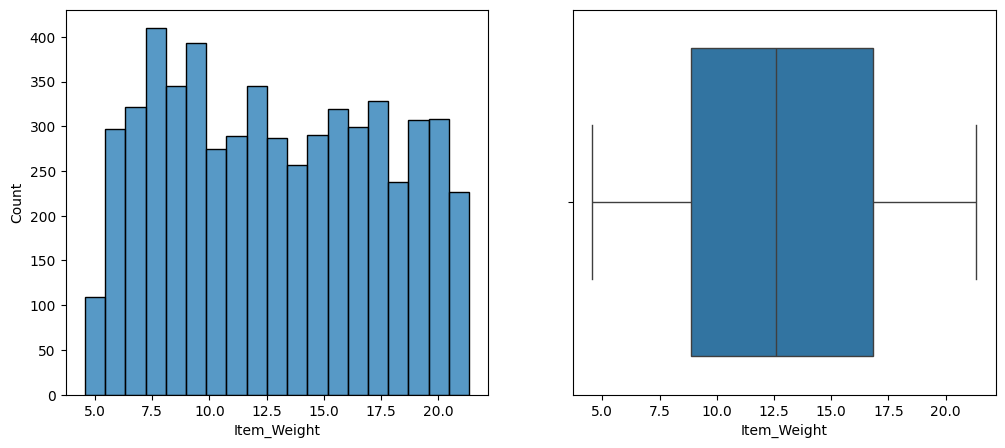

In [21]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=x_train_c,x="Item_Weight",ax=ax[0])
sns.boxplot(data=x_train_c,x="Item_Weight",ax=ax[1])

In [22]:
def visualize_numeric_features(data_frame,col_name):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    sns.histplot(data=data_frame,x=col_name,ax=ax[0])
    sns.boxplot(data=data_frame,x=col_name,ax=ax[1])

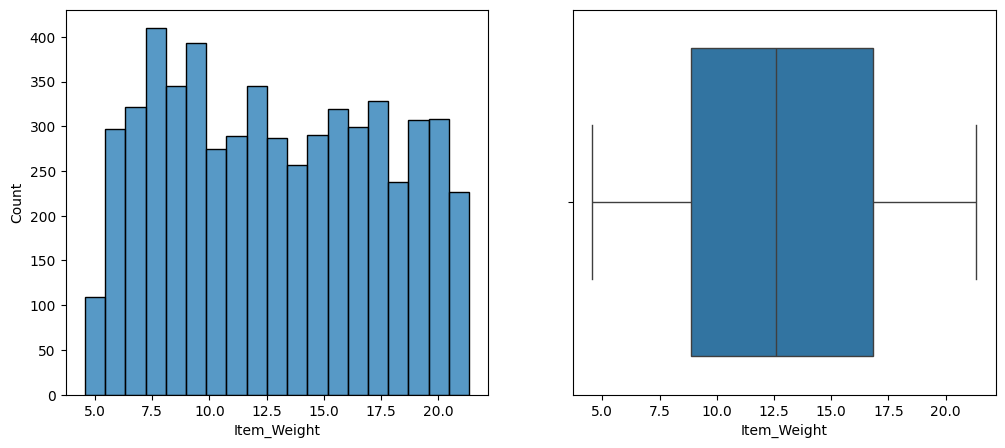

In [23]:

visualize_numeric_features(x_train_c,'Item_Weight')

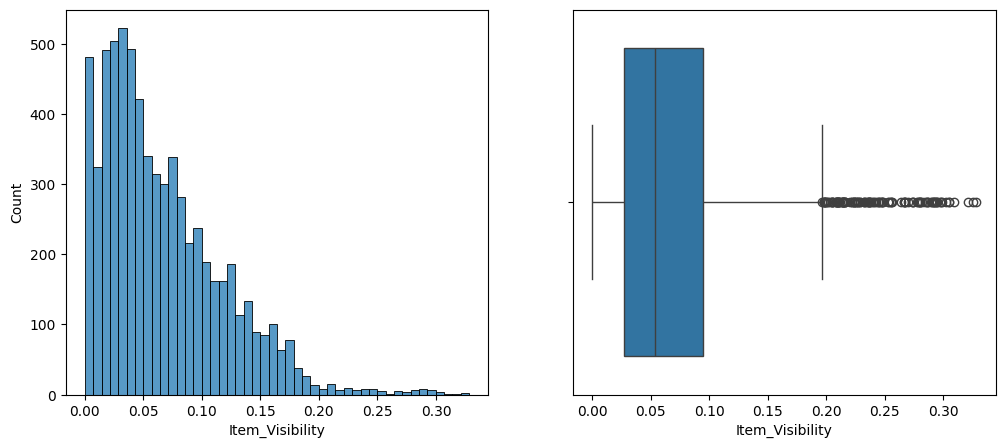

In [24]:
visualize_numeric_features(x_train_c,"Item_Visibility")

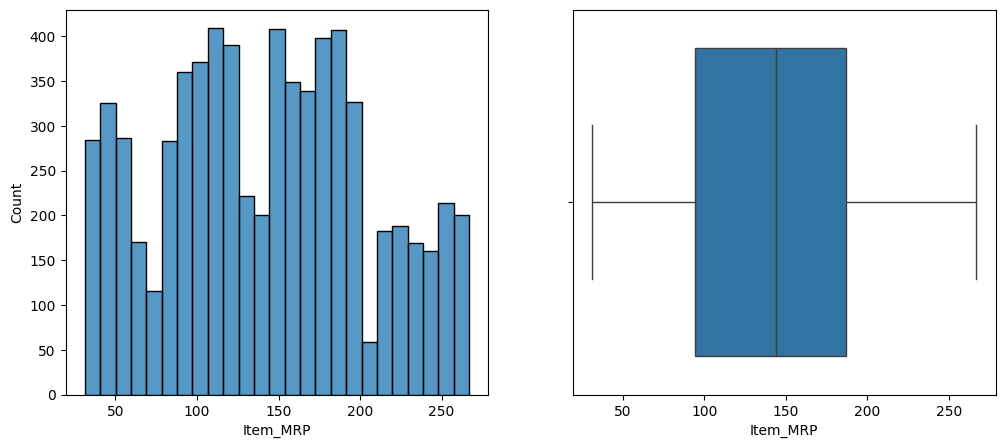

In [25]:
visualize_numeric_features(x_train_c,"Item_MRP")

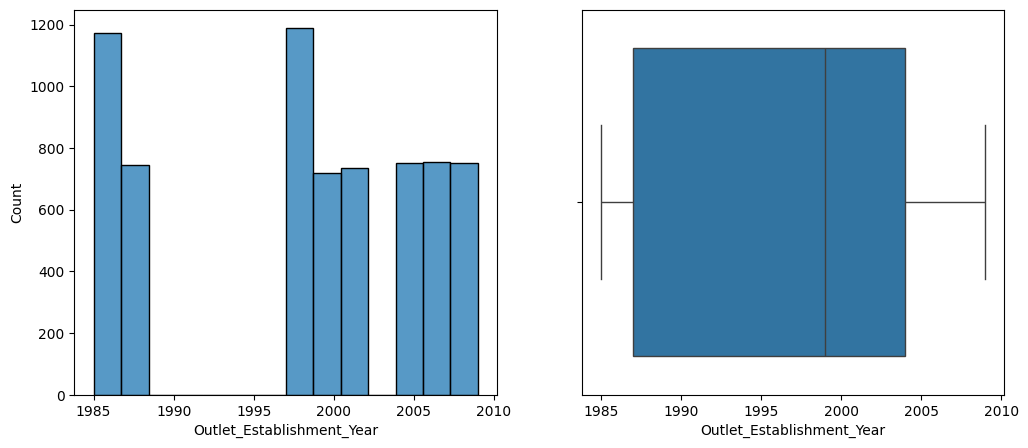

In [26]:
visualize_numeric_features(x_train_c,"Outlet_Establishment_Year")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

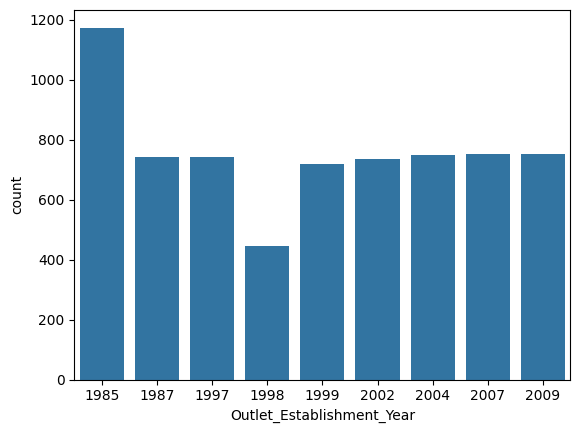

In [27]:
sns.countplot(data=x_train_c,x='Outlet_Establishment_Year')

In [28]:
cat_features=x_train_c.select_dtypes(include=['object'])

In [29]:
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,Regular,Fruits and Vegetables,OUT049,Medium,Tier 1,Supermarket Type1
7757,NCF54,Low Fat,Household,OUT045,NaN,Tier 2,Supermarket Type1
764,FDY03,Regular,Meat,OUT046,Small,Tier 1,Supermarket Type1
6867,FDQ20,Low Fat,Fruits and Vegetables,OUT045,NaN,Tier 2,Supermarket Type1
2716,FDP34,Low Fat,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1


In [30]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4883,6818,6818
unique,1555,5,16,10,3,3,4
top,FDQ40,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,4035,1002,761,2233,2703,4446


In [31]:
cat_features.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,1935
Outlet_Location_Type,0
Outlet_Type,0


In [32]:
cat_features['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDQ40,9
NCI54,9
FDD38,9
DRE49,9
NCB18,9
...,...
FDX48,1
FDC38,1
FDO33,1


In [33]:
cat_features['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,4035
Regular,2336
LF,267
reg,93
low fat,87


In [34]:
cat_features['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1002
Snack Foods,971
Household,744
Frozen Foods,681
Dairy,536
Canned,513
Baking Goods,509
Health and Hygiene,409
Soft Drinks,354


In [35]:
cat_features['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,761
OUT017,753
OUT018,752
OUT035,750
OUT013,744
OUT046,743
OUT045,736
OUT049,720
OUT010,446


In [36]:
cat_features['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2233
Small,1906
High,744


In [37]:
cat_features['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,2703
Tier 2,2239
Tier 1,1876


In [38]:
cat_features['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,4446
Grocery Store,859
Supermarket Type3,761
Supermarket Type2,752


In [39]:
x_train['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

,count
Item_Identifier,
FD,4887
NC,1292
DR,639


In [40]:
x_train['Item_Identifier'].str[:2].value_counts()

,count
Item_Identifier,
FD,4887
NC,1292
DR,639


In [41]:
def create_item_type(data_frame):
    data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type']=data_frame['Item_Type'].map({'FD':'Food',
                                                         'NC':'Non-Consumables',
                                                         'DR':'Drink'})

    return data_frame

In [42]:
x_train_c=create_item_type(x_train_c)
x_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,9.500,Regular,0.035206,Food,171.3448,OUT049,1999,Medium,Tier 1,Supermarket Type1
7757,NCF54,18.000,Low Fat,0.047473,Non-Consumables,170.5422,OUT045,2002,NaN,Tier 2,Supermarket Type1
764,FDY03,17.600,Regular,0.076122,Food,111.7202,OUT046,1997,Small,Tier 1,Supermarket Type1
6867,FDQ20,8.325,Low Fat,0.029845,Food,41.6138,OUT045,2002,NaN,Tier 2,Supermarket Type1
2716,FDP34,12.850,Low Fat,0.137228,Food,155.5630,OUT046,1997,Small,Tier 1,Supermarket Type1


In [43]:
x_train_c['Item_Type']

,Item_Type
549,Food
7757,Non-Consumables
764,Food
6867,Food
2716,Food
...,...
5734,Food
5191,Food
5390,Non-Consumables
860,Food


In [44]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1174
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1935
Outlet_Location_Type,0


In [45]:
x_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4416,DRA24,NaN
4900,DRA24,19.35
8371,DRA59,8.27
6057,DRA59,NaN
...,...,...
6056,NCZ42,10.50
6879,NCZ53,9.60
2084,NCZ53,NaN
1896,NCZ54,NaN


In [46]:
x_train_c[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
4953,Drink,20.75
3571,Drink,7.39
4169,Drink,18.85
6611,Drink,NaN
4273,Drink,6.96
...,...,...
594,Non-Consumables,5.82
7048,Non-Consumables,7.68
6108,Non-Consumables,11.30
8516,Non-Consumables,18.60


In [47]:
ITEM_ID_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING=dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'],ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [48]:
ITEM_TYPE_WEIGHT_PIVOT=x_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING=dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'],ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.6), ('Food', 12.65), ('Non-Consumables', 13.1)])

In [49]:
print(x_train_c.columns.tolist())


['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [50]:
def impute_item_weight(data_frame):
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    data_frame.loc[:,'Item_Weight']=data_frame.loc[:,'Item_Weight'].fillna(data_frame.loc[:,'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

    return data_frame

In [51]:
x_train_c=impute_item_weight(x_train_c)

In [52]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1935
Outlet_Location_Type,0


In [53]:
x_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           413
Supermarket Type1  High            744
                   Medium          720
                   Small          1493
Supermarket Type2  Medium          752
Supermarket Type3  Medium          761
dtype: int64

In [54]:
from scipy.stats import mode

OUTLET_TYPE_SIZE_PIVOT = x_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0] #fetch the first element of the mode array for each group
).reset_index()

OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [55]:
def impute_outlet_size(data_frame):
    # data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna(data_frame.loc[:,'Outlet_Size'].map(OUTLET_TYPE_SIZE_MAPPING))
    data_frame.loc[:,'Outlet_Size']=data_frame.loc[:,'Outlet_Size'].fillna('Medium')  # or any default
    return data_frame

In [56]:
x_train_c=impute_outlet_size(x_train_c)

In [57]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [58]:
x_train_c.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [59]:
x_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,4035
Regular,2336
LF,267
reg,93
low fat,87


In [60]:
def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content']=data_frame['Item_Fat_Content'].replace({
        'Low Fat' : 'Low_Fat',
        'LF':'Low_Fat',
        'reg':'Regular',
        'low fat': 'Low_Fat'})
    return data_frame

In [61]:
x_train_c=standardize_item_fat_content(x_train_c)
x_train_c['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low_Fat,4389
Regular,2429


In [62]:
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              587
                 Regular               52
Food             Low_Fat             2510
                 Regular             2377
Non-Consumables  Low_Fat             1292
dtype: int64

In [63]:
x_train_c.loc[x_train_c['Item_Type']=='Non-Consumables','Item_Fat_Content']

,Item_Fat_Content
7757,Low_Fat
2992,Low_Fat
5955,Low_Fat
1024,Low_Fat
5717,Low_Fat
...,...
8322,Low_Fat
466,Low_Fat
6265,Low_Fat
5390,Low_Fat


In [64]:
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type']=='Non-Consumables','Item_Fat_Content']='Non_Edible'
    return data_frame

In [65]:
x_train_c=correct_item_fat_content(x_train_c)
x_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              587
                 Regular               52
Food             Low_Fat             2510
                 Regular             2377
Non-Consumables  Non_Edible          1292
dtype: int64

In [66]:
x_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [67]:
def prepare_dataset(data_frame):
    data_frame=create_item_type(data_frame)

    data_frame=impute_item_weight(data_frame)

    data_frame=impute_outlet_size(data_frame)

    data_frame=standardize_item_fat_content(data_frame)

    data_frame=correct_item_fat_content(data_frame)

    return data_frame

In [68]:
x_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1174
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1935
Outlet_Location_Type,0


In [69]:
x_train=prepare_dataset(x_train)
x_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [70]:
x_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,289
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,475
Outlet_Location_Type,0


In [71]:
x_test=prepare_dataset(x_test)
x_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [72]:
cat_feats= x_train.select_dtypes(include=['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
549,FDW44,Regular,Food,OUT049,Medium,Tier 1,Supermarket Type1
7757,NCF54,Non_Edible,Non-Consumables,OUT045,Medium,Tier 2,Supermarket Type1
764,FDY03,Regular,Food,OUT046,Small,Tier 1,Supermarket Type1
6867,FDQ20,Low_Fat,Food,OUT045,Medium,Tier 2,Supermarket Type1
2716,FDP34,Low_Fat,Food,OUT046,Small,Tier 1,Supermarket Type1


In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)


OneHotEncoder(handle_unknown='ignore')

In [74]:
ohe_features_names=ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_features_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [75]:
num_feats_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.500,0.035206,171.3448,1999
1,18.000,0.047473,170.5422,2002
2,17.600,0.076122,111.7202,1997
3,8.325,0.029845,41.6138,2002
4,12.850,0.137228,155.5630,1997


In [76]:
cat_feats_train=x_train.select_dtypes(include=['object'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_features_names)
x_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
x_train_final=pd.concat([num_feats_train,x_train_cat_ohe],axis=1)
x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.500,0.035206,171.3448,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.325,0.029845,41.6138,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.850,0.137228,155.5630,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
final_columns=x_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [79]:
num_feats_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test=x_test.select_dtypes(include=['object'])
x_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_features_names)
x_test_final=pd.concat([num_feats_test,x_test_cat_ohe],axis=1)
x_test_final=x_test_final[final_columns]
x_test_final.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,10.195,0.012456,197.5110,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

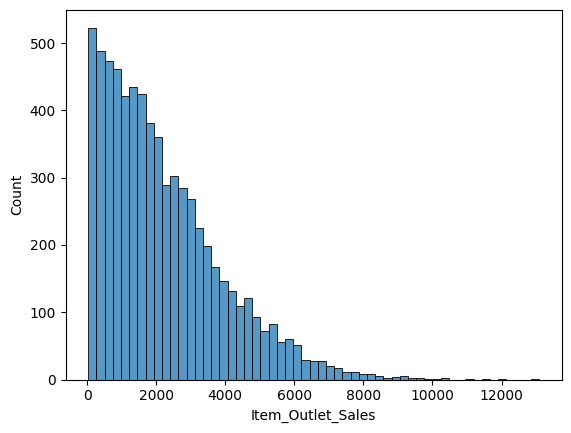

In [80]:
sns.histplot(y_train)

In [81]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor , HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate

In [82]:
def train_and_eval_model(model,x_train,y_train,cv=5):
  cv_results=cross_validate(model,x_train,y_train,cv=cv,scoring=('r2','neg_root_mean_squared_error'))
  print("model:",model)
  r2_scores=cv_results['test_r2']
  print('R2 cv scores:',r2_scores)
  print('R2 cv scores mean/stdv:',np.mean(r2_scores),'/',np.std(r2_scores))

  rmse_scores=cv_results['test_neg_root_mean_squared_error']
  rmse_scores=[-1*score for score in rmse_scores]

  print('RMSE cv score:', rmse_scores)
  print('RMSE cv scores mean/stdv:',np.mean(rmse_scores),'/',np.std(rmse_scores))





In [83]:
rf=RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf,x_train=x_train_final,y_train=y_train)

model: RandomForestRegressor(random_state=42)
R2 cv scores: [0.54364797 0.54805236 0.55426899 0.545104   0.53332496]
R2 cv scores mean/stdv: 0.5448796553864217 / 0.006830873601246644
RMSE cv score: [np.float64(1144.1434919650153), np.float64(1147.13454259799), np.float64(1162.5265062570224), np.float64(1170.0785130241295), np.float64(1175.6628447665123)]
RMSE cv scores mean/stdv: 1159.909179722134 / 12.411220443101413


In [84]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

model: GradientBoostingRegressor(random_state=42)
R2 cv scores: [0.58797024 0.59433337 0.58711481 0.59376258 0.55718379]
R2 cv scores mean/stdv: 0.5840729580133956 / 0.013759609120428971
RMSE cv score: [np.float64(1087.1633248875835), np.float64(1086.8132818034915), np.float64(1118.8737688934368), np.float64(1105.7295261776585), np.float64(1145.2156183674256)]
RMSE cv scores mean/stdv: 1108.759104025919 / 21.856619202719834


In [85]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

model: HistGradientBoostingRegressor(random_state=42)
R2 cv scores: [0.55916775 0.57452571 0.5662238  0.58285735 0.55611037]
R2 cv scores mean/stdv: 0.5677769974121321 / 0.009854986118031222
RMSE cv score: [np.float64(1124.519980613057), np.float64(1113.0302230688078), np.float64(1146.8306700448643), np.float64(1120.472610791833), np.float64(1146.602814544481)]
RMSE cv scores mean/stdv: 1130.2912598126086 / 13.90881612693839


In [86]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 cv scores: [0.5627235  0.55649844 0.55975121 0.57875657 0.53491423]
R2 cv scores mean/stdv: 0.5585287899816211 / 0.01407141126686528
RMSE cv score: [np.float64(1119.9756147212909), np.float64(1136.365057593643), np.float64(1155.355209678714), np

In [87]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,x_train=x_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 30
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 30
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Warning] Found

In [89]:
x_train_copy=x_train.copy().drop(columns=['Item_Identifier'])

cat_cols=x_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols=x_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [90]:
x_train_copy[cat_cols]=x_train_copy[cat_cols].astype('category')
n_categorical_features=len(cat_cols)
n_numerical_features=len(num_cols)

x_train_copy=x_train_copy[cat_cols+num_cols]

x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           6818 non-null   category
 1   Item_Type                  6818 non-null   category
 2   Outlet_Identifier          6818 non-null   category
 3   Outlet_Size                6818 non-null   category
 4   Outlet_Location_Type       6818 non-null   category
 5   Outlet_Type                6818 non-null   category
 6   Item_Weight                6818 non-null   float64 
 7   Item_Visibility            6818 non-null   float64 
 8   Item_MRP                   6818 non-null   float64 
 9   Outlet_Establishment_Year  6818 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 307.4 KB


In [91]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector



In [92]:
categorical_mask=[True]*n_categorical_features + [False]*n_numerical_features

ordinal_encoder=make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan),
     make_column_selector(dtype_include='category'),
     ),
    remainder='passthrough'
)

hgb=make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(random_state=42,categorical_features=categorical_mask),
)

train_and_eval_model(model=hgb,x_train=x_train_copy,y_train=y_train)


model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aeb71b38910>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                         

In [93]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,x_train=x_train_copy,y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 10
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 10
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

In [94]:
cat_feats=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_features_names=ohe.get_feature_names_out(input_features=cat_feats.columns)


In [96]:
num_feats_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_features_names)
x_train_final=pd.concat([num_feats_train,x_train_cat_ohe],axis=1)


x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non-Consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.500,0.035206,171.3448,1999,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.325,0.029845,41.6138,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.850,0.137228,155.5630,1997,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

model: GradientBoostingRegressor(random_state=42)
R2 cv scores: [0.58695507 0.59783587 0.58444616 0.60768945 0.57638549]
R2 cv scores mean/stdv: 0.5906624059346013 / 0.010932476763038136
RMSE cv score: [np.float64(1088.5017879209795), np.float64(1082.1113743156532), np.float64(1122.48382829508), np.float64(1086.61061118315), np.float64(1120.110633060381)]
RMSE cv scores mean/stdv: 1099.9636469550487 / 17.558137896429297


In [98]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

model: HistGradientBoostingRegressor(random_state=42)
R2 cv scores: [0.55916775 0.57452571 0.5662238  0.58285735 0.55611037]
R2 cv scores mean/stdv: 0.5677769974121321 / 0.009854986118031222
RMSE cv score: [np.float64(1124.519980613057), np.float64(1113.0302230688078), np.float64(1146.8306700448643), np.float64(1120.472610791833), np.float64(1146.602814544481)]
RMSE cv scores mean/stdv: 1130.2912598126086 / 13.90881612693839


In [99]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 cv scores: [0.50524677 0.51450634 0.50913028 0.52043626 0.50406424]
R2 cv scores mean/stdv: 0.5106767782239313 / 0.006091227826157576
RMSE cv score: [np.float64(1191.3100825609743), np.float64(1188.945860929699), np.float64(1219.9711540233272), 

In [100]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,x_train=x_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 30
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 30
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Warning] Found

In [103]:
from sklearn.feature_extraction import FeatureHasher

hash_vector_size=50
fh=FeatureHasher(n_features=hash_vector_size,input_type='string')
hashed_df = pd.DataFrame(fh.transform(x_train['Item_Identifier'].astype(str).apply(lambda x: [x])).toarray(),
                       columns=['H' + str(i) for i in range(hash_vector_size)])

hashed_df.head()


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
cat_feats=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names= ohe.get_feature_names_out(input_features=cat_feats.columns)

In [107]:
num_feats_train=x_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train=x_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_train_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_train).toarray(),columns=ohe_features_names)
x_train_final=pd.concat([num_feats_train, hashed_df, x_train_cat_ohe],axis=1)


x_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.500,0.035206,171.3448,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18.000,0.047473,170.5422,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,17.600,0.076122,111.7202,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.325,0.029845,41.6138,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.850,0.137228,155.5630,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
gb=GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,x_train=x_train_final,y_train=y_train)

model: GradientBoostingRegressor(random_state=42)
R2 cv scores: [0.58875149 0.59751198 0.5839698  0.60407314 0.55815143]
R2 cv scores mean/stdv: 0.586491568195498 / 0.015780947616366954
RMSE cv score: [np.float64(1086.132145885111), np.float64(1082.5470350610308), np.float64(1123.1270022057877), np.float64(1091.6072896298413), np.float64(1143.9636739014118)]
RMSE cv scores mean/stdv: 1105.4754293366364 / 24.021332902667112


In [109]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,x_train=x_train_final,y_train=y_train)

model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 cv scores: [0.52788346 0.51140577 0.510639   0.55376974 0.48092977]
R2 cv scores mean/stdv: 0.5169255482393031 / 0.023846404158693196
RMSE cv score: [np.float64(1163.7377075540853), np.float64(1192.7363759034629), np.float64(1218.0948782100527),

In [110]:
hgb=HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,x_train=x_train_final,y_train=y_train)

model: HistGradientBoostingRegressor(random_state=42)
R2 cv scores: [0.55426955 0.57262938 0.55769565 0.58271624 0.55186628]
R2 cv scores mean/stdv: 0.5638354189617159 / 0.01188513226476327
RMSE cv score: [np.float64(1130.7501478966599), np.float64(1115.5078468598194), np.float64(1158.049286455522), np.float64(1120.6621126566902), np.float64(1152.0711882542728)]
RMSE cv scores mean/stdv: 1135.4081164245927 / 16.884564370165883


In [111]:
lgbr=LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,x_train=x_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 80
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 80
[LightGBM] [Info] Start training from score 2214.849499
[LightGBM] [Warning] Found

In [112]:
x_test.shape

(1705, 11)

In [118]:
hashed_test_df = pd.DataFrame(fh.transform(x_test['Item_Identifier'].astype(str).apply(lambda x: [x])).toarray(),
                       columns=['H' + str(i) for i in range(hash_vector_size)])



num_feats_test=x_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test=x_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
x_test_cat_ohe=pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_features_names)
x_test_final=pd.concat([num_feats_test, hashed_test_df, x_test_cat_ohe],axis=1)


x_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [119]:
xgr=xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
xgr.fit(x_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [120]:
y_pred=xgr.predict(x_test_final)

In [121]:
from sklearn.metrics import r2_score,mean_squared_error

In [123]:
print('r2_score:',r2_score(y_test,y_pred))
# print("RMSE:",mean_squared_error(y_test,y_pred,squared=False))

r2_score: 0.5321830644103196


In [124]:
rmse = mean_squared_error(y_test, y_pred)**0.5
print("RMSE:", rmse)

RMSE: 1127.6135985297067


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

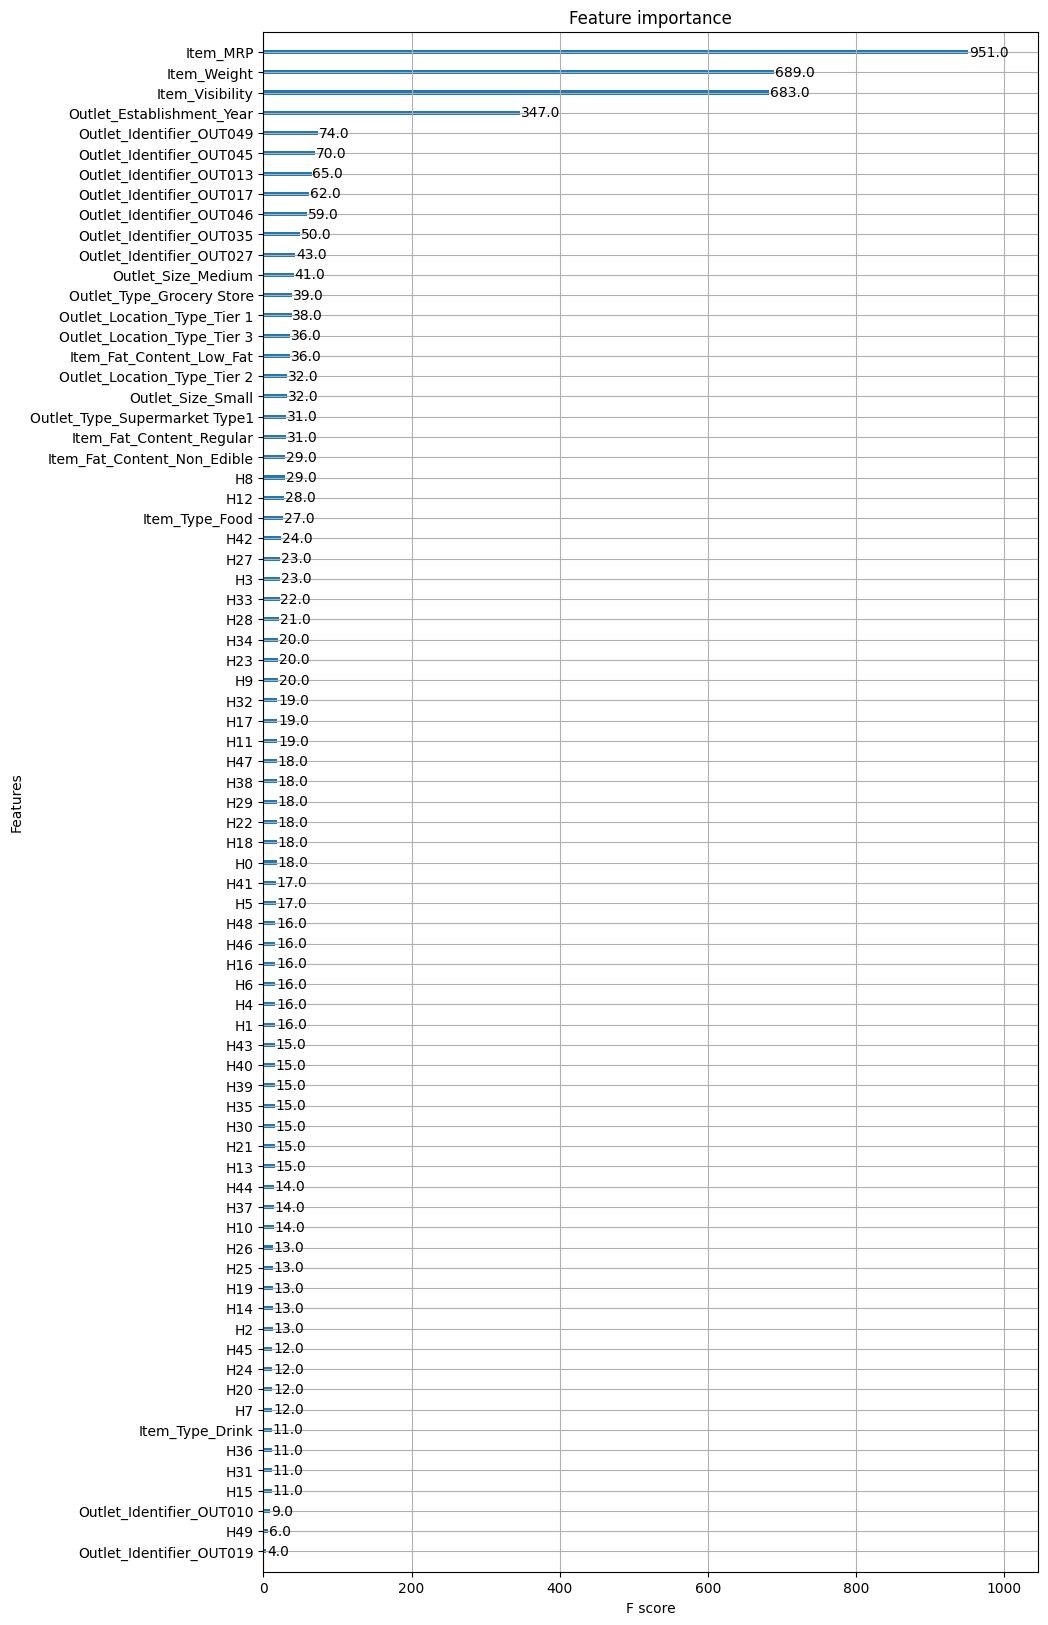

In [127]:
from xgboost import plot_importance
fig, ax= plt.subplots(1,1,figsize=(10,20))
plot_importance(xgr,ax=ax)

In [129]:
gb=GradientBoostingRegressor(random_state=SEED)
gb.fit(x_train_final,y_train)

GradientBoostingRegressor(random_state=42)

In [130]:
y_pred1=gb.predict(x_test_final)

In [131]:
print('r2_score:',r2_score(y_test,y_pred1))

r2_score: 0.6041265545693972


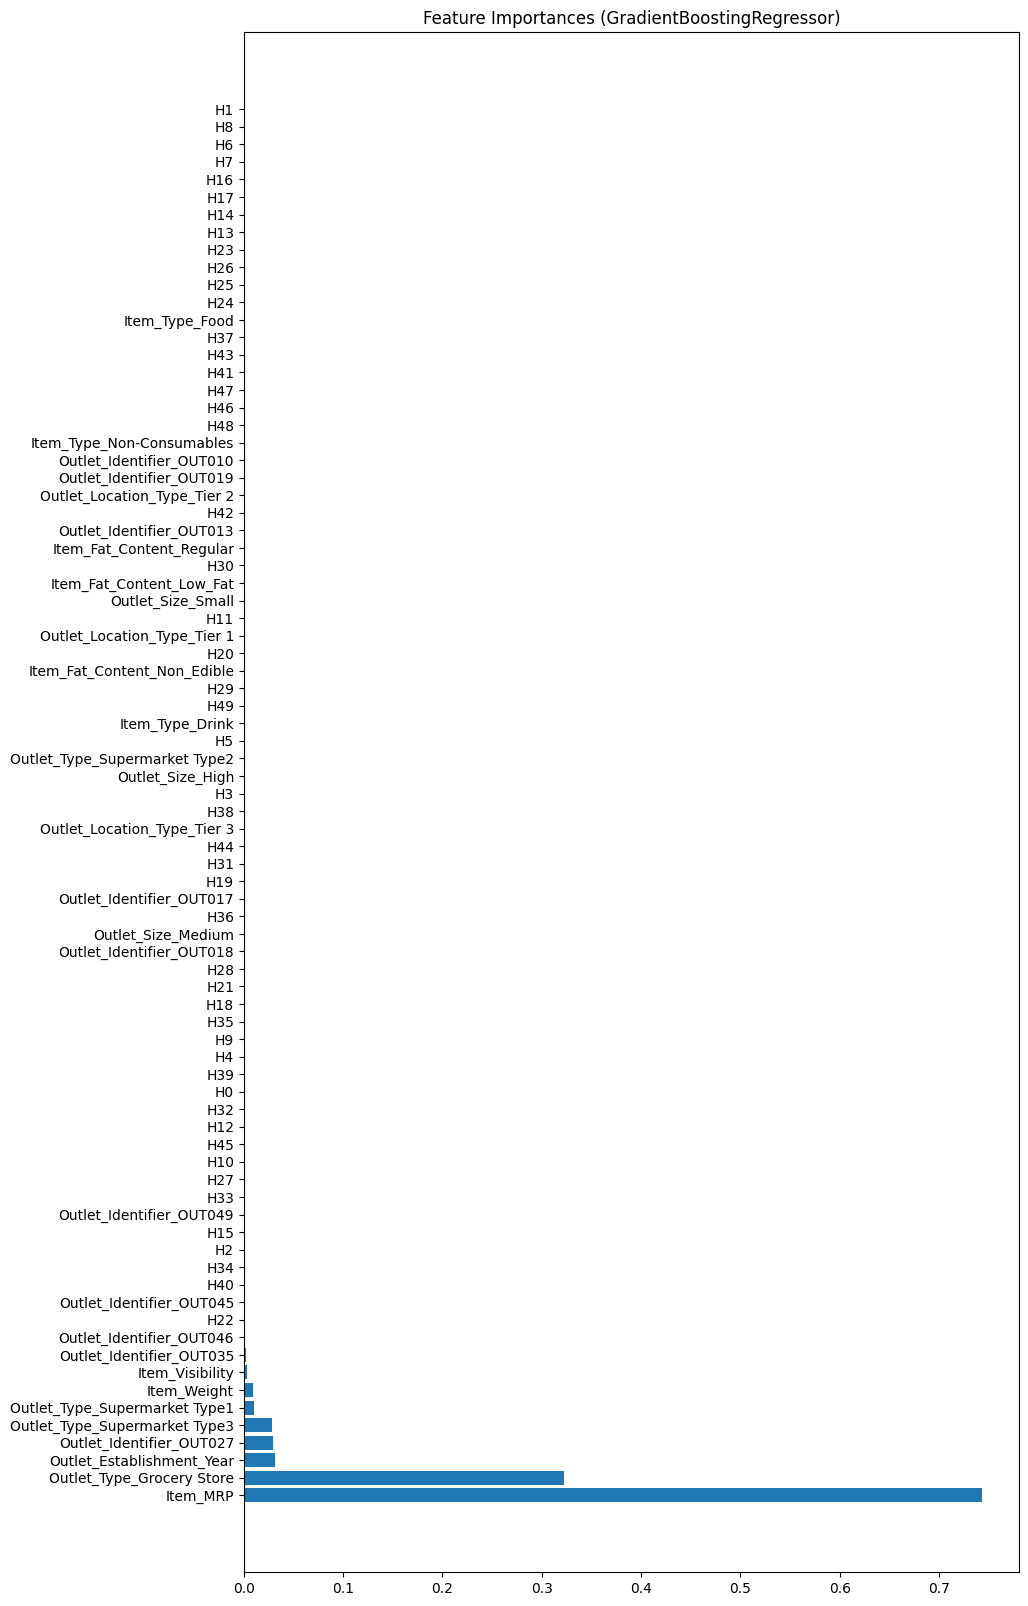

In [133]:
fig, ax= plt.subplots(1,1,figsize=(10,20))
# Use the correct feature importance plotting function for GradientBoostingRegressor
from sklearn.inspection import permutation_importance
# Calculate permutation importances
result = permutation_importance(gb, x_train_final, y_train, n_repeats=10, random_state=42)
# Get feature importances
importances = result.importances_mean
# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]
# Plot feature importances
ax.barh(x_train_final.columns[sorted_idx], importances[sorted_idx])
ax.set_title("Feature Importances (GradientBoostingRegressor)")
plt.show()